In [1]:
import numpy as np
import pandas as pd

In [2]:
customer_df = pd.read_csv('/Users/lenovo1/Downloads/lab-cleaning-numerical-data/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
print(customer_df.head())


  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [4]:
print(customer_df.shape)

(9134, 24)


In [5]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
cols = []
for col in customer_df.columns:
        cols.append(col.lower().replace(' ', '_'))
customer_df.columns = cols

In [7]:
print(customer_df.head())

  customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                             5                         0                   1

In [8]:
from datetime import datetime
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])
 
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [9]:
customer_df.isnull().values.any()

False

In [10]:
def split(x):
    
    categorical = x.select_dtypes("object")
    numerical= x.select_dtypes("integer", "float")
    
   
    
    display(categorical)
    display(numerical)
    
split(customer_df)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


In [11]:
categorical = customer_df.select_dtypes("object")
numerical= customer_df.select_dtypes("integer", "float")

categorical=categorical.drop(columns="customer")
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [12]:
c_mat=numerical.corr().abs()
s = c_mat.unstack()
so = s.sort_values(kind="quicksort",ascending=False)

print (so)

income                         income                           1.000000
monthly_premium_auto           monthly_premium_auto             1.000000
number_of_open_complaints      number_of_open_complaints        1.000000
months_since_policy_inception  months_since_policy_inception    1.000000
months_since_last_claim        months_since_last_claim          1.000000
number_of_policies             number_of_policies               1.000000
months_since_policy_inception  months_since_last_claim          0.042959
months_since_last_claim        months_since_policy_inception    0.042959
income                         months_since_last_claim          0.026715
months_since_last_claim        income                           0.026715
monthly_premium_auto           months_since_policy_inception    0.020257
months_since_policy_inception  monthly_premium_auto             0.020257
income                         monthly_premium_auto             0.016665
monthly_premium_auto           income              

In [13]:
numerical['number_of_open_complaints'].unique()

array([0, 2, 1, 3, 5, 4])

In [14]:
def split_numerics(df, num_unique=36):
    df_discrete=[]
    df_continuous=[]
    for col in df:
        if len(df[col].unique())==num_unique:
            df_continuous.append(df[col])
        else:
            df_discrete.append(df[col])
    df_continuous = pd.DataFrame(df_continuous).T
    df_discrete = pd.DataFrame(df_discrete).T 
    
    return df_discrete, df_continuous

In [15]:
df_discrete, df_continuous = split_numerics(numerical)
display(df_discrete)
display(df_continuous)

,income,monthly_premium_auto,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,5,0,1
1,0,94,42,0,8
2,48767,108,38,0,2
3,0,106,65,0,7
4,43836,73,44,0,1
...,...,...,...,...,...
9129,71941,73,89,0,2
9130,21604,79,28,0,1
9131,0,85,37,3,2
9132,21941,96,3,0,3


,months_since_last_claim
0,32
1,13
2,18
3,18
4,12
...,...
9129,18
9130,14
9131,9
9132,34


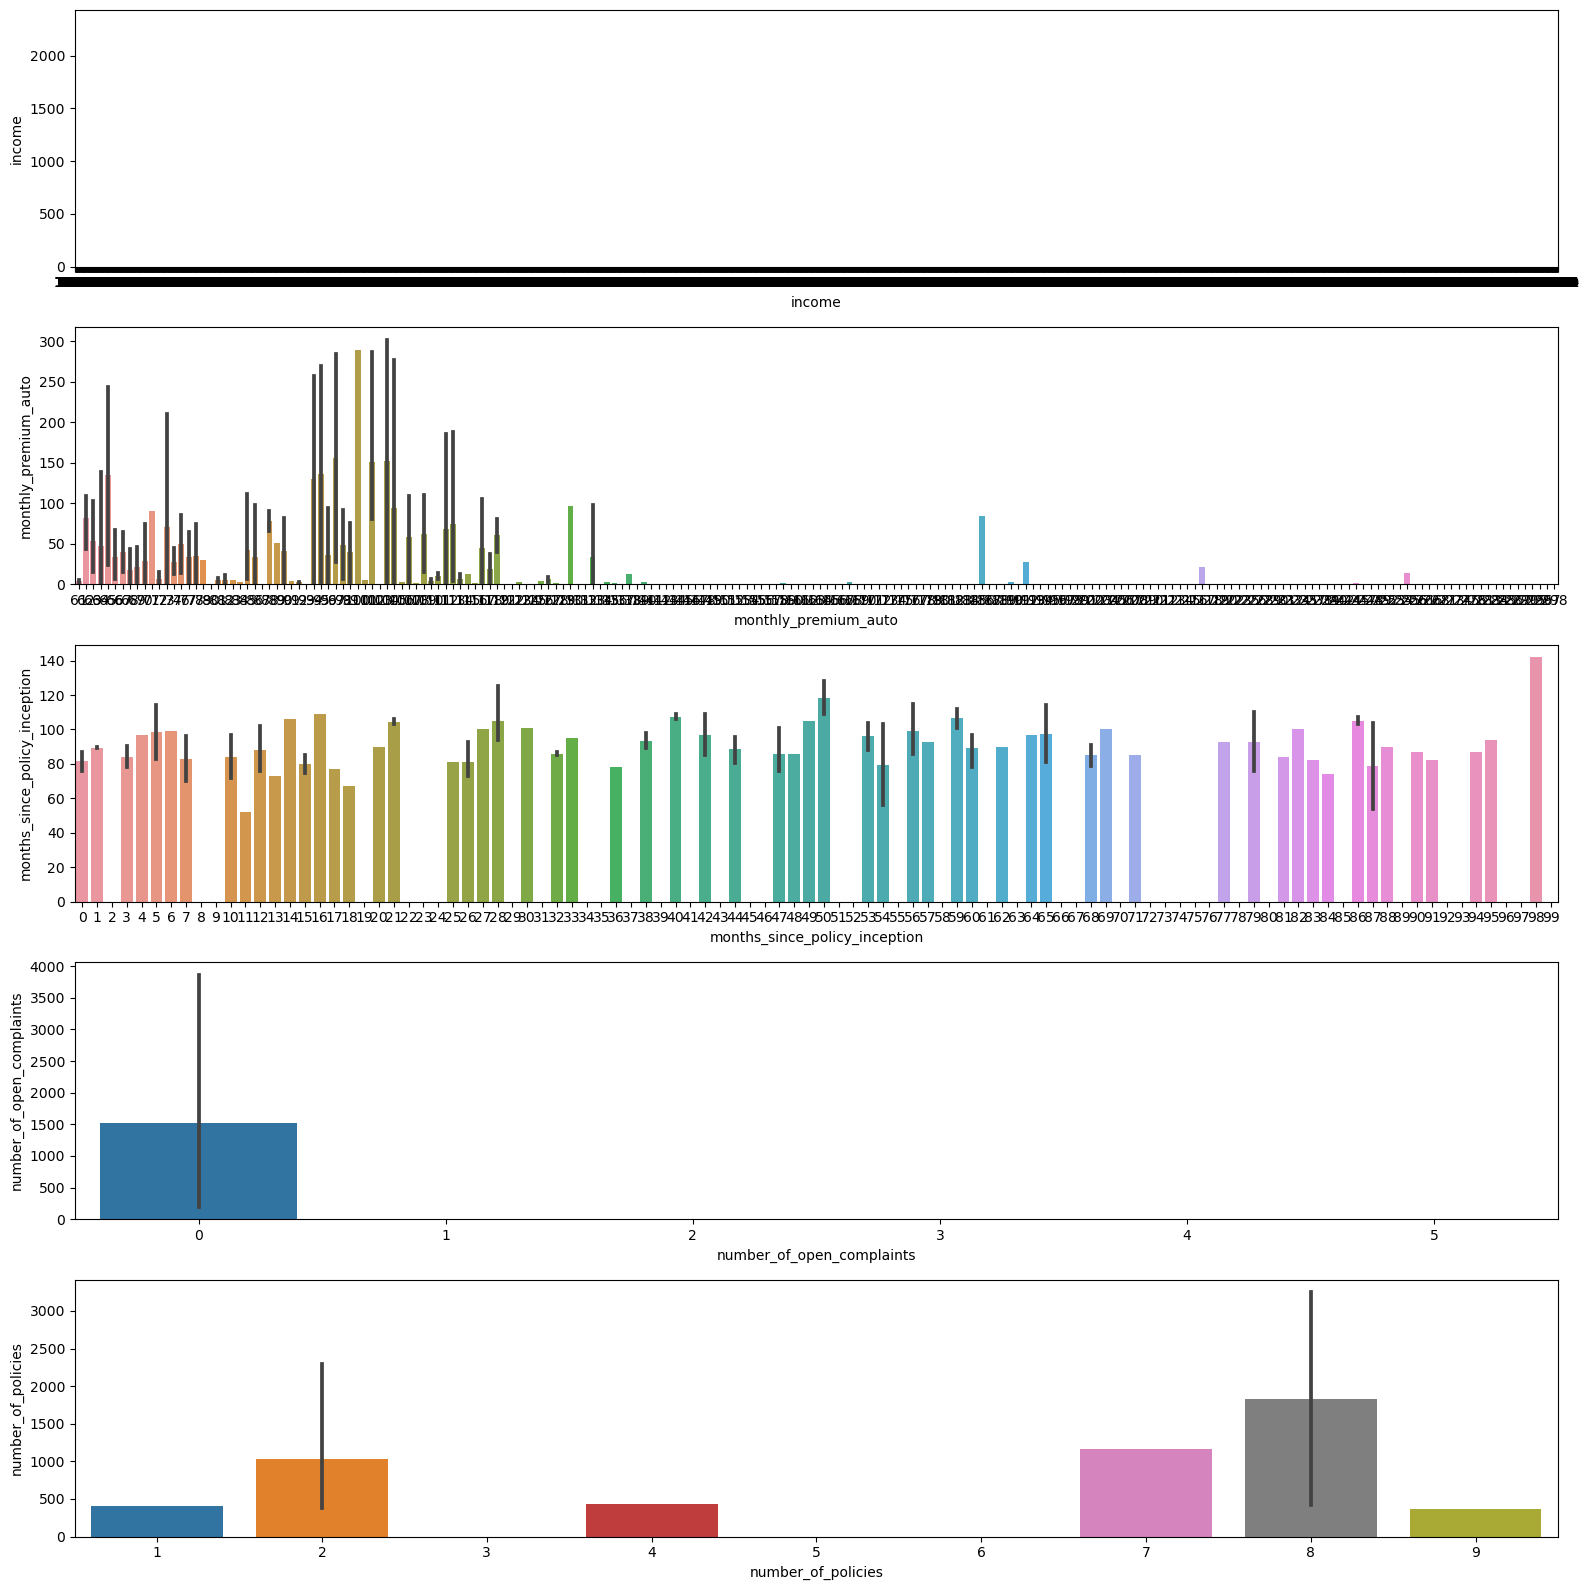

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_bar(df_discrete):
    plt_size = len(df_discrete.columns)
    fig, ax = plt.subplots(plt_size, figsize=(16,16))
    n = 0
    for i in df_discrete.columns:
        sns.barplot(data=df_discrete, x=df_discrete[i], y=df_discrete[i].value_counts(), ax = ax[n])
        n += 1
    
    plt.tight_layout()    
    plt.show()
    
plot_bar(df_discrete)

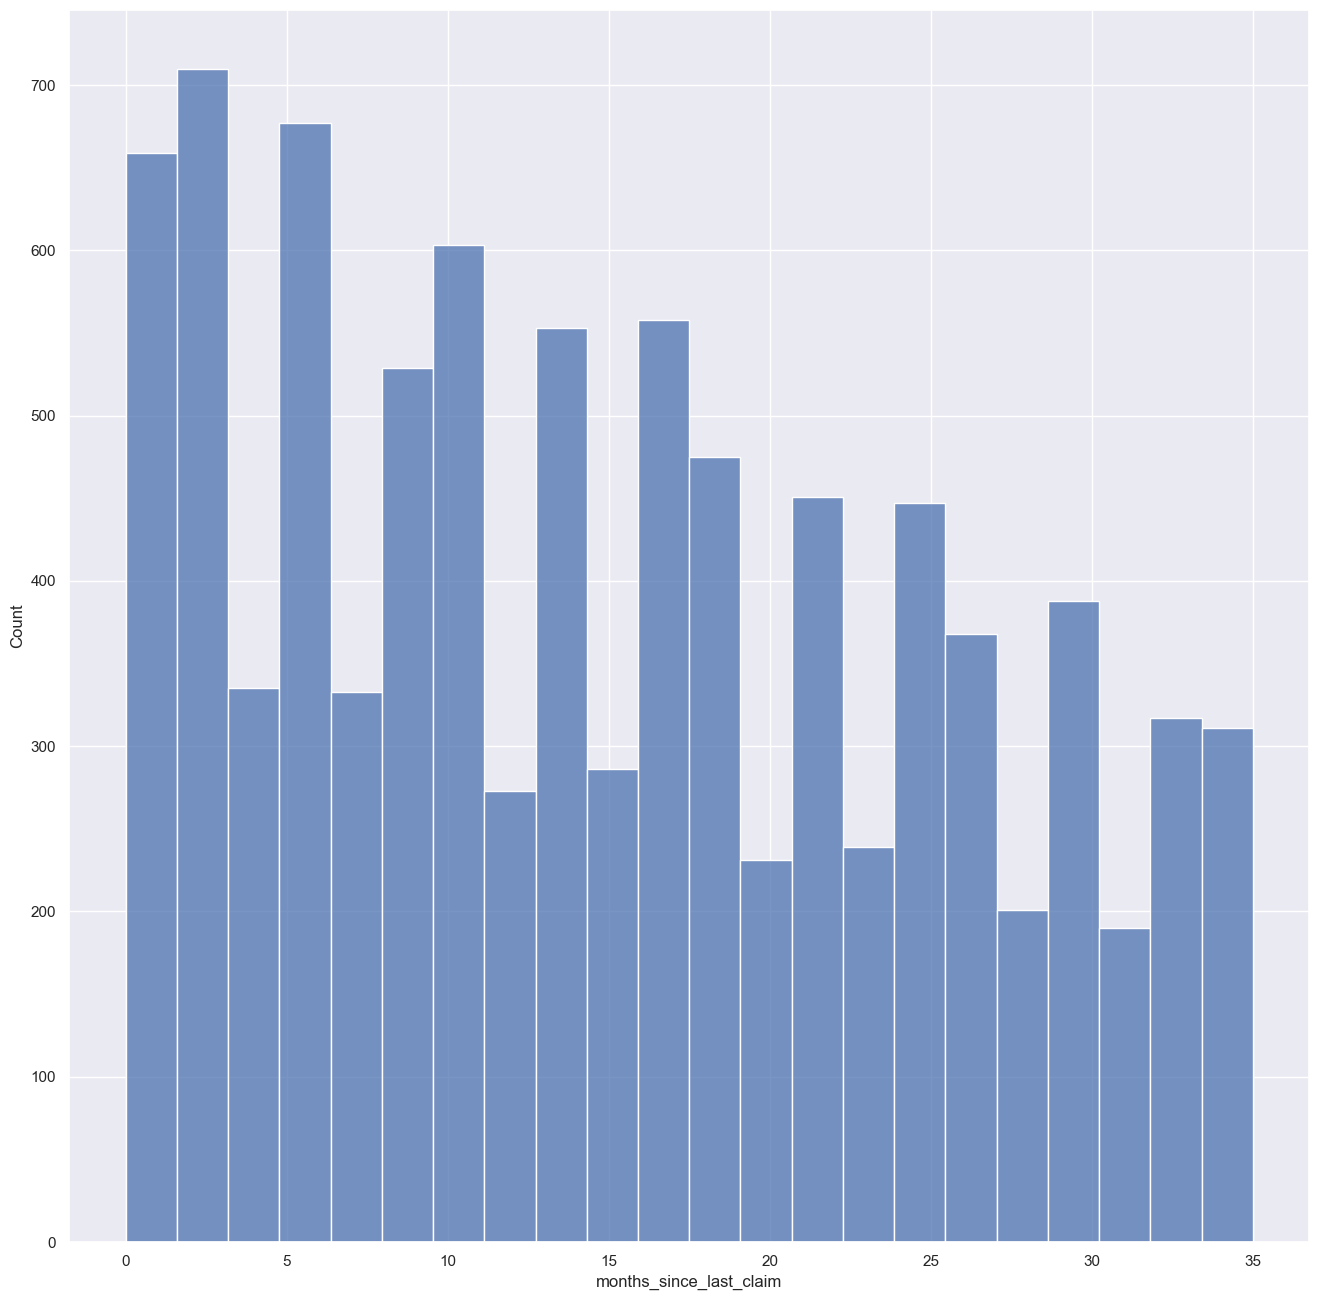

In [19]:
def plot_hist(df_continuous):
    for i in df_continuous.columns:
        sns.set(rc={"figure.figsize":(16, 16)})
        sns.histplot(data=df_continuous, x=i)
        plt.show()
plot_hist(df_continuous)

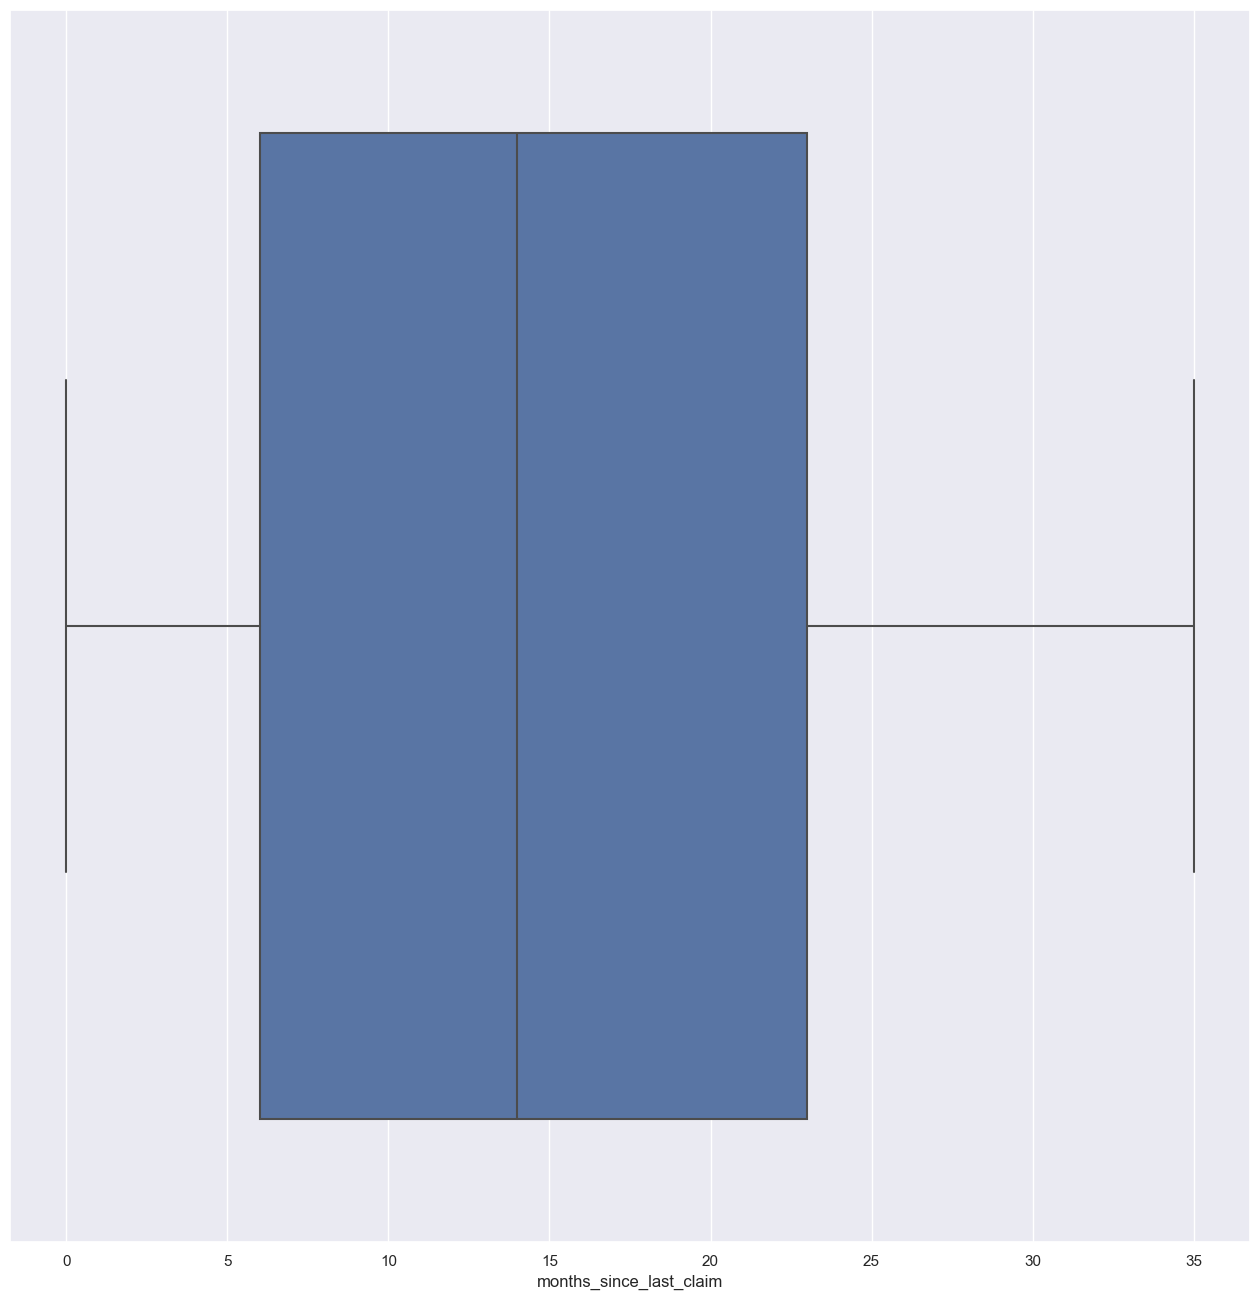

In [20]:
def plot_box(df_continuous):
    for i in df_continuous.columns:
        sns.set(rc={"figure.figsize":(16, 16)})
        sns.boxplot(data=df_continuous, x=i)
        plt.show()
plot_box(df_continuous)